In [1]:
import requests
import json 
import pandas as pd
import numpy as np
import os
import random
import time
from fake_useragent import UserAgent

#pandas read csv
proxyIP = pd.read_csv("../../py-proxy/proxyIP.csv")
proxyIPs = proxyIP['proxyIP']



ua = UserAgent()
data = []


try:
    
    proxy_ip0 = random.choice(proxyIPs)
    print(proxy_ip0)
    user_agent = UserAgent()
    valid_data = []

    for y in range(2018,2023):
      for m in range(1,13):
        print(y,m)
        url =  "https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={:4d}{:02d}01&stockNo=2882&response=json&_=1689749700657".format(y,m)
          #格式化字符函數 str.format()，透過 {} 和 format 來代替 %運算符號
          #  The format specification can be written after : in {}.
        print(url)
          #formats an integer (d) to a field of minimum width 2 (2), with zero-padding on the left (leading 0)
        
        headers = {
        "Content-Type" : "application/json",
        "Accept-Encoding":"gzip, deflate, br",
        "Accept-Language":"zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7",
        "user-agent":ua.random # 隨機user-agent
        }

        response = requests.get(url,headers=headers,timeout=5)


        js_data = json.loads(response.text)
        # print(js_data)
        stock = js_data["data"]
        fields0 = js_data["fields"]
        # print(stock)
        # print(fields0)
        # detail = stock[日期][項目]
        N = len(stock)
        for i in range(0,N-1):
            date = stock[i][0]
            trading_volume = stock[i][1] #成交股數 Trading Volume 
            transaction= stock[i][2]
            opening_price= stock[i][3]
            highest_price= stock[i][4]
            lowest_price= stock[i][5]
            closing_price= stock[i][6]
            change= stock[i][7]
            NT= stock[i][8] #成交筆數 (Number of Transactions)
            data.append([date,trading_volume,transaction,opening_price,highest_price,lowest_price,closing_price,change,NT])
        
        # print(type(stock))
      time.sleep(5)


    # print(type(data),type(fields0))
    # print(data)
    # 將資料轉成dataframe export to csv
    # # use Pandas
    year_df = pd.DataFrame(data,columns=fields0)
    print("2018-2022 stock df")
    # 轉成csv檔
    os.makedirs('./2018_2022',exist_ok=True)
    year_df.to_csv("./2018_2022/2018_2022_year_stock.csv",encoding="utf-8-sig")
    p = pd.read_csv('./2018_2022/2018_2022_year_stock.csv')  
    print(p.head())
except:
    print("scrapy wrong",response.status_code)







8.219.97.248:80
2018 1
https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20180101&stockNo=2882&response=json&_=1689749700657


NameError: name 'response' is not defined

**爬蟲2882 五年內股票資料**
**匯入csv，建立Dataset**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates    #處理日期
import warnings 

warnings.filterwarnings("ignore")
data = pd.read_csv('./2018_2022/2018_2022_year_stock.csv')
# print(data.shape)
# print(data.sample(7))

In [ ]:
# print(data.info())

In [ ]:
date =data['日期']
print(date[:5])

# only can run once
for i in range(0,len(date)):
  date.iloc[i]=date.iloc[i].replace(date.iloc[i][0:3], str(int(date.iloc[i][0:3]) + 1911))

  
print(date.iloc[2][0:3],str(int(date.iloc[0][0:3]) + 1911))
print(date.iloc[2][0:5])
print(date.iloc[0][0:4])
# data.info()
print('-'*20)


date=pd.to_datetime(date,format='%Y/%m/%d' ) 
data['日期'] = pd.to_datetime(data['日期'])
date.head()
print(data.info())

0    107/01/02
1    107/01/03
2    107/01/04
3    107/01/05
4    107/01/08
Name: 日期, dtype: object
201 2112
2018/
2018
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  930 non-null    int64         
 1   日期          930 non-null    datetime64[ns]
 2   成交股數        930 non-null    object        
 3   成交金額        930 non-null    object        
 4   開盤價         930 non-null    float64       
 5   最高價         930 non-null    float64       
 6   最低價         930 non-null    float64       
 7   收盤價         930 non-null    float64       
 8   漲跌價差        930 non-null    object        
 9   成交筆數        930 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 72.8+ KB
None


0     2018-01-02
1     2018-01-03
2     2018-01-04
3     2018-01-05
4     2018-01-08
         ...    
925   2021-12-23
926   2021-12-24
927   2021-12-27
928   2021-12-28
929   2021-12-29
Name: 日期, Length: 930, dtype: datetime64[ns]


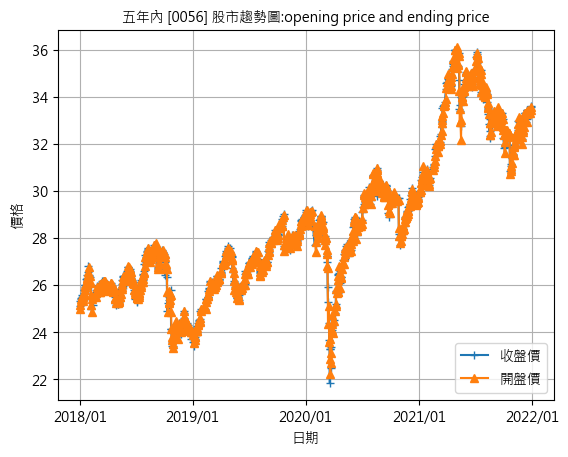

In [ ]:
# date vs open
# date vs close

# #趨勢圖需要 日期、價格、開盤價、收盤價
date = data['日期']
opening_price = data['開盤價']
end_price = data['收盤價']

print(date)
fig, ax = plt.subplots()

# # 設定中文字體
plt.rcParams['font.sans-serif'] = ["Microsoft JhengHei"]

ax.ticklabel_format(axis="x", useOffset=False)


# plt.figure(figsize=(15,8))
ax.plot(date,end_price,label="close",marker="+")
ax.plot(date,opening_price,label="open",marker="^")
ax.set_title("五年內 [2882] 股市趨勢圖:opening price and ending price" ,fontsize='medium')
ax.set_xlabel("日期")
ax.set_ylabel("價格")

#設定x軸主刻度顯示格式（月）
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m"))
#設定x軸主刻度間距
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1))
ax.legend(["收盤價","開盤價"],loc="lower right")
# ax.tight_layout()#子圖表會自動保持合適的間距。

ax.grid(True)

plt.plot()
# 存成圖片
plt.savefig("annual_opening_and_ending_price_matplotlib_chat.png")
# # 顯示圖片
plt.show()

0     2018-01-02
1     2018-01-03
2     2018-01-04
3     2018-01-05
4     2018-01-08
         ...    
925   2021-12-23
926   2021-12-24
927   2021-12-27
928   2021-12-28
929   2021-12-29
Name: 日期, Length: 930, dtype: datetime64[ns]


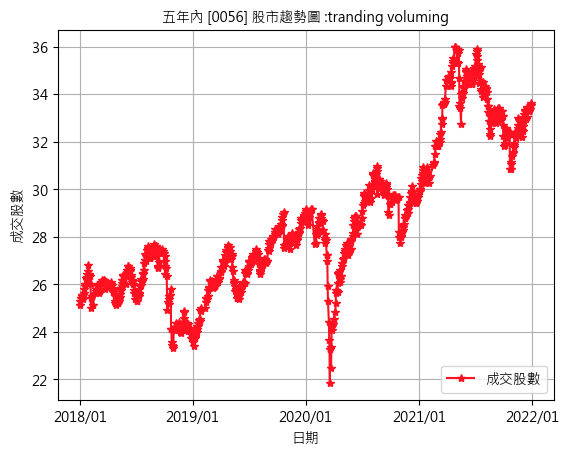

In [ ]:
# date vs trading_voluming


# date vs open
# date vs close

# #趨勢圖需要 日期、成交股數
date = data['日期']
trading_volume = data['成交股數']

print(date)
fig, ax = plt.subplots()

# # 設定中文字體
plt.rcParams['font.sans-serif'] = ["Microsoft JhengHei"]

ax.ticklabel_format(axis="x", useOffset=False)


# plt.figure(figsize=(15,8))
ax.plot(date,end_price,label="close",marker="*",color="#ff1122")
ax.set_title("五年內 [2882] 股市趨勢圖 :tranding voluming" ,fontsize='medium')
ax.set_xlabel("日期")
ax.set_ylabel("成交股數")

#設定x軸主刻度顯示格式（月）
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m"))
#設定x軸主刻度間距
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1))
ax.legend(["成交股數"],loc="lower right")
# ax.tight_layout()#子圖表會自動保持合適的間距。

ax.grid(True)

plt.plot()
# 存成圖片
plt.savefig("annual_trading_volume_matplotlib_chat.png")
# # 顯示圖片
plt.show()

## 實現預測股票Stock Price Prediction Project using TensorFlow

**Importing Libraries and Dataset**
let’s scrape the dataset into the pandas dataframe. 

**install**

**error and solution**